In [46]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
import seaborn as sns
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].dropna(subset=['salary_year_avg']).copy()
df_filter = df_DS_US.groupby('company_name')['salary_year_avg'].median().sort_values(ascending=False).reset_index(name='median_salary').head()

# df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
# top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()
# top_companies
# sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')

ax = plt.gca()
sns.barplot(data=df_filter,x='median_salary',y='company_name',hue='company_name',palette='dark:r')
ax.legend().remove()
plt.xlabel('median salary')
plt.ylabel('')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))
plt.title('top 5 companies with the highest median salary')

plt.show()

In [ ]:
import seaborn as sns
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].dropna(subset=['salary_year_avg']).copy()

sns.histplot(data=df_DS_US,x='salary_year_avg',bins=25)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)

plt.show()

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# df_loc = df[df['job_country']=='India'].dropna(subset=['salary_year_avg'])
# df_box = pd.concat([df_loc[df_loc['job_title_short']==job][['job_title_short','salary_year_avg']] for job in job_titles])

df_box = df[df['job_title_short'].isin(job_titles) & (df['job_country']=='India')].dropna(subset=['salary_year_avg'])
# df_box

sns.boxplot(data=df_box, x='salary_year_avg',y='job_title_short')    #可以区分/group不同的职位并画图
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

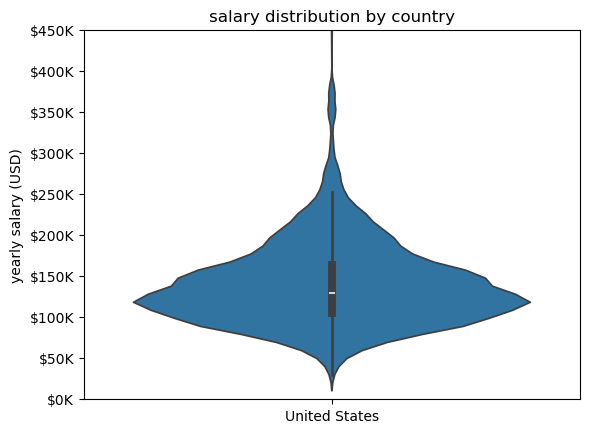

In [117]:
df_violin = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].dropna(subset='salary_year_avg')
# df_violin

sns.violinplot(data=df_violin,x='job_country',y='salary_year_avg')
plt.title('salary distribution by country')
plt.xlabel('')
plt.ylabel('yearly salary (USD)')
plt.ylim(0,450_000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

plt.show()